# &#128100; Epilepsy detection from EEG Signals

### Epilepsy is caused by occurenc of one or more epileptic seizures, seizure is caused by a sudden abnormal, self-sustained electrical discharge that occurs in the cerebral networks and usually lasts for less than a few minutes. Electroencephalography (EEG) is a particularly effective diagnostic tool to study the functional anatomy of the brain during an Epileptic Seizure (ES) attack.


In [73]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d|ice|');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; } 
h2 {color: purple; font-family: 'Orbitron';}
h3,h4 {color: #818286; font-family: 'Roboto';}
span {font-family:'Roboto'; color:black;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:red;}      
</style>

## Importing Libraries

In [74]:
import pandas as pd
#import scipy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
#from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import seaborn as sns
from mlxtend.classifier import EnsembleVoteClassifier,StackingClassifier
import time



pd.set_option('display.max_columns', 100)

## Loading the dataset

### dataset name is **Epileptic Seizure Recognition.csv**

In [75]:

data = pd.read_csv('Epileptic Seizure Recognition.csv')

In [76]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,...,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,...,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,...,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,...,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,...,55,54,38,19,4,-1,10,22,26,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [78]:

data.tail()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,-63,-60,-57,-52,-46,-33,-27,-33,-32,...,-9,-15,-19,-20,-18,-14,0,9,21,34,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,-52,-67,-96,-123,-143,-155,-167,-176,-185,...,52,57,61,60,54,53,55,62,65,68,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,90,76,18,5,10,23,48,32,4,...,-43,-48,-44,-22,-17,18,50,45,-9,-78,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,-56,-77,-105,-110,-103,-89,-80,-81,-98,-113,...,-98,-103,-99,-81,-56,-61,-67,-111,-112,-120,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,23,13,11,-3,-5,-9,-14,1,27,60,69,69,50,33,20,15,4,-5,-4,-8,-15,-13,-2,21,39,48,37,10,-23,-47,-71,-80,-74,-59,-44,-30,-17,-3,6,13,...,49,65,64,44,15,-14,-38,-68,-99,-107,-108,-83,-46,0,30,39,44,33,22,8,-13,-33,-61,-70,-75,-74,-58,-18,19,54,71,76,74,65,56,18,-28,-75,-98,-94,-59,-25,-4,2,5,4,-2,2,20,4


In [79]:
data.shape

(11500, 180)

## Dataset Description

we divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time.<br>

So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

<b>y</b> contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:
 - 5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open
 - 4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed
 - 3 - Yes they identify where the region of the tumor was in the brain
 - 2 - They recorder the EEG from the area where the tumor was located
 - 1 - Recording of seizure activity
All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure.

From the first view we can assume we need to solve **multi-classification task**, but, after accurate exploaring definitions of classes of <b>y</b>, we can realeyes we can *reform* our **multi-classification task** to **binary classification task**.<br>
For that we can just combine {2,3,4,5} classes as 0 class (not epileptic seizure) and keep {1} class as 1 (epileptic seizure).

#  &#128223; Data Pre-processing and EDA

In [80]:
#Before joining the classes, let us check y values for balancing
data['y'].value_counts()

1    2300
2    2300
3    2300
4    2300
5    2300
Name: y, dtype: int64

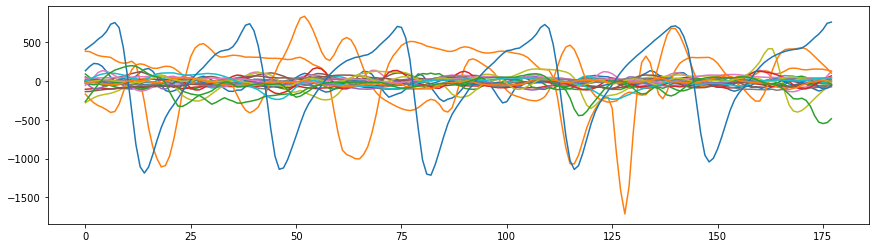

In [81]:

plt.figure(figsize=(50,4))
plt.subplot(131)
[plt.plot(data.values[i][1:-1]) for i in range(23)];

### Changing Y column to Binary Classification

In [82]:
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
data['y'] = data['y'].map(dic)

### "Remove Unnamed" column (it has information which we don't need)

In [83]:
data = data.drop('Unnamed', axis = 1)

In [84]:
data=shuffle(data)

In [85]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,-6.964087,-5.773826,-4.700783,-4.143826,-4.546087,-5.53200,-6.670435,-7.702348,-7.894696,-8.081391,...,-7.629391,-7.373565,-7.439913,-7.592348,-6.897652,-6.000348,-5.423913,-5.151043,-5.586870,-6.281478,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,161.197812,158.045513,157.490904,160.163082,163.996955,167.74431,171.232021,171.484787,169.299229,166.255922,...,158.301750,157.214361,158.679911,160.183325,162.002986,164.260512,166.182755,167.154785,167.414376,168.020316,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,

In [86]:
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(data[data['y'] == 0]), len(data[data['y'] == 1])))

Number of records of Non Epileptic 9200 VS Epilepttic 2300


## Epileptic Vs Non Epileptic

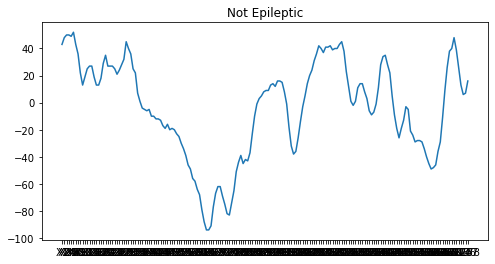

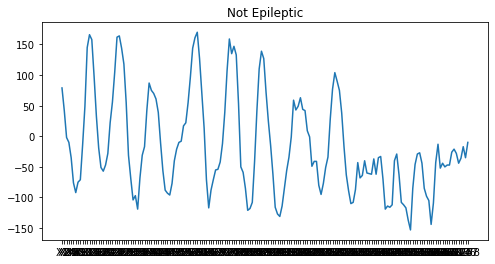

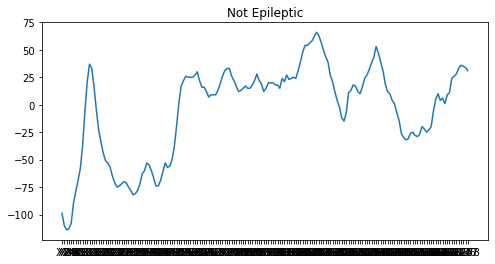

In [87]:
[(plt.figure(figsize=(8,4)), plt.title('Not Epileptic'), plt.plot(data[data['y'] == 0].iloc[i][0:-1])) for i in range(3)];

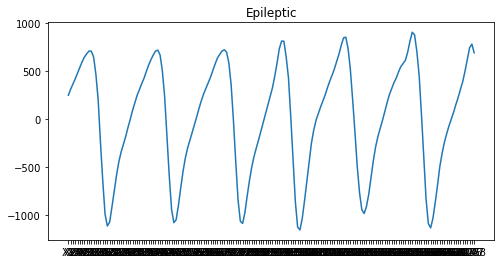

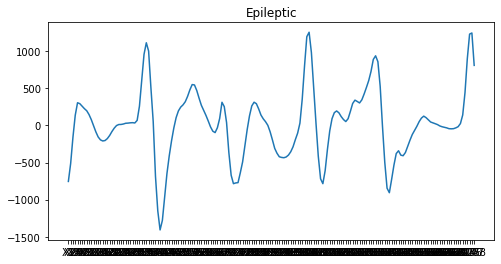

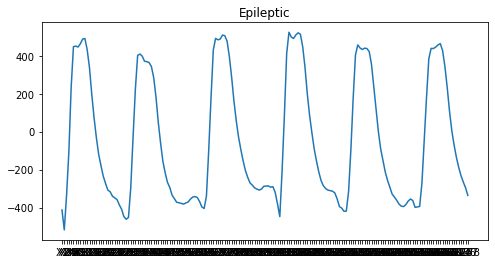

In [88]:
[(plt.figure(figsize=(8,4)), plt.title('Epileptic'), plt.plot(data[data['y'] == 1].iloc[i][0:-1])) for i in range(3)];

# &#128295; Building Machine Learning Models

In [89]:
import imblearn
# define oversampling strategy
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(data.drop('y', axis=1), data['y'])

X.shape, y.shape

((18400, 178), (18400,))

#### Check the balance for y

In [90]:
#Let us group all the Epileptic occureses and Non Epileptic
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(y == True), len(y == False)))

Number of records of Non Epileptic 18400 VS Epilepttic 18400


#### Normalizing

In [91]:
normalized_df = pd.DataFrame(normalize(X))
normalized_df['y'] = y

### Spliting the dataset into test and train

In [92]:


X = normalized_df.drop('y', axis=1)
y = normalized_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#Check the shapes after splitting
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(12880, 178), (5520, 178), (12880,), (5520,)]

## Default Models without Params
- LogisticRegression
- Support Vector Machines -
- K-nearest Classifier
- Decision Tree Classifier


In [93]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_log_reg) + ' %')

56.85 %


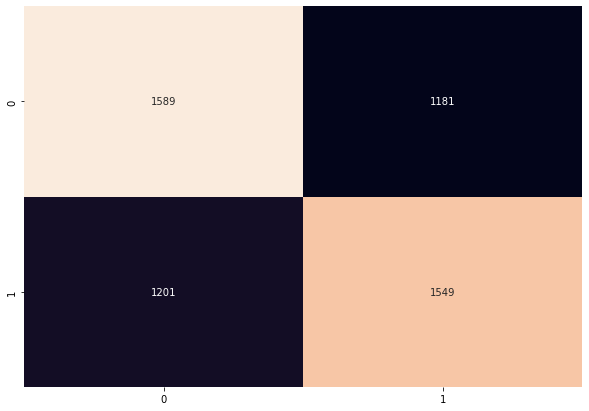

In [94]:
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False)
plt.show()

In [95]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_svc) + '%')

91.14%


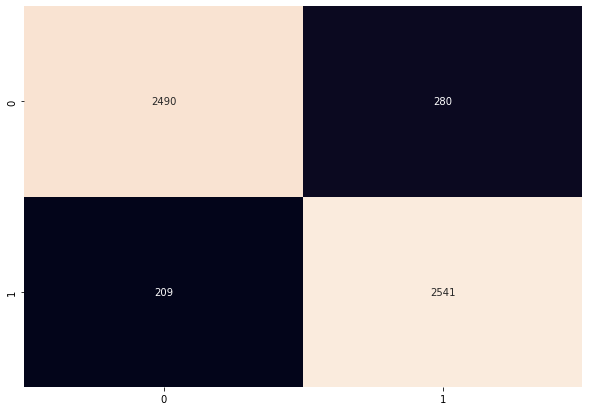

In [96]:
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False)
plt.show()

In [97]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_knn)+'%')

90.27%


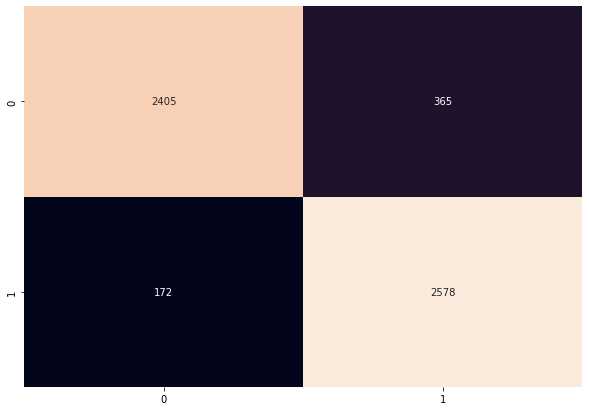

In [98]:
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False)
plt.show()

In [99]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_knn)+'%')

98.41%


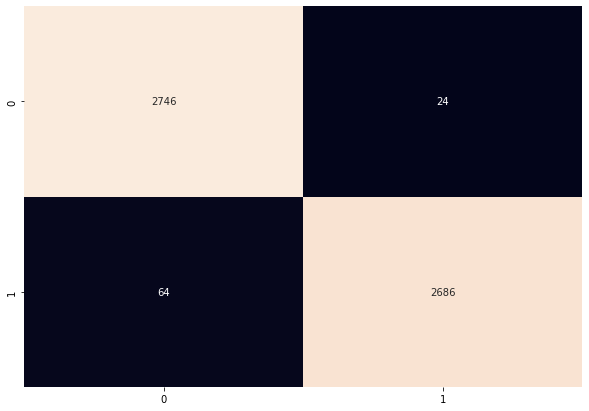

In [100]:
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False)
plt.show()

# Hybrid Algorithm - 1
![title](Hybrid_meta.png)
##   In this Algorithmic Approach,We have sub classifier and meta classifiers,here also all the sub classifier and meta classifier is trained individually.later,the predictions of the sub classifiers are given to meta classifir as an input.and final prediction is made using Meta classifier.The two algorithms Random Forest and KNN are used as subclassifiers and SVC is used as final meta classifier
                

In [101]:
from mlxtend.classifier import EnsembleVoteClassifier,StackingClassifier


### Training Indiviual Models(sub classifiers) Sepearately


In [102]:
rf=RandomForestClassifier()
clf1=KNeighborsClassifier()
clf2=SVC(probability=True)

### Merging them using Stacking technique

In [103]:
sclf=StackingClassifier(classifiers=[clf1,rf], meta_classifier=clf2)
scores=sclf.fit(X_train,y_train)


In [104]:
sclf.score(X_test,y_test)

0.9853260869565217

In [105]:
from sklearn.metrics import confusion_matrix

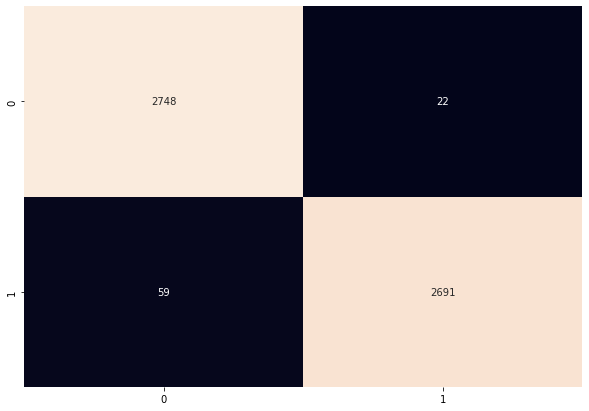

In [106]:
y_pred=sclf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False)
plt.show()

# Hybrid Algorithm - 2
![title](hybrid_2.png)

##  In this Algorithmic Approach,We have used three algorithm which are individually trained and predict their individual predictions.later,these predictions are ensembled using voting technique.i.e. Majority among the predictions.whichever two algoithms give same output are considered for final prediction.The final prediction is made by considering majority of three algorithms.
                

### Training Indiviual Models(sub classifiers) Sepearately

In [107]:
rf=RandomForestClassifier()
clf1=KNeighborsClassifier()
clf2=SVC(probability=True)

### Merging them using Ensemble Voting technique

In [108]:
eclf=EnsembleVoteClassifier(clfs=[clf1,clf2,rf],voting='soft')
eclf.fit(X_train,y_train)

EnsembleVoteClassifier(clfs=[KNeighborsClassifier(), SVC(probability=True),
                             RandomForestClassifier()],
                       voting='soft')

In [109]:
eclf.score(X_test,y_test)

0.9538043478260869

###  &#128210; Confusion Matrix

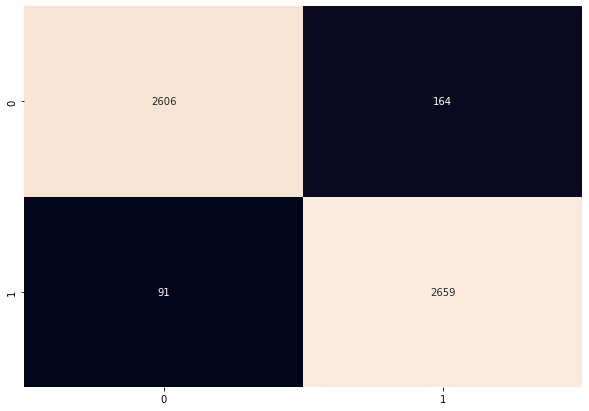

In [110]:
y_pred=eclf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False)
plt.show()


<style>
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron';} 
h2, h3 {color: slategray; font-family: 'Orbitron'; }
h4 {color: #818286; font-family: 'Roboto';}
span {font-family:'Roboto'; color:black; }  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:black;}      
</style>

  # Insmonia Prediction
  
  

# &#128100; Insomnia detection 

### Insomnia is a sleep disorder that is often diagnosed through an evaluation of a patient's sleep history and symptoms. In some cases, EEG (electroencephalogram) data may be collected to assess brain activity during sleep and help identify any underlying neurological issues contributing to the insomnia.


## Loading the dataset

### dataset name is **Insomnia.csv**

In [111]:
data = pd.read_csv('Insomnia Detection.csv')

In [112]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X6.V1.83,-5,-13,-4,3,4,4,12,28,45,58,64,40,37,19,12,6,2,-6,-20,-29,-34,-38,-30,-14,-1,5,8,6,1,7,13,13,10,12,11,11,-6,2,7,4,3,-17,-37,-53,-60,-62,-49,-32,-21,...,30,38,41,40,27,21,15,6,-4,-16,-43,-51,-50,-38,-16,17,42,51,27,10,-17,-21,2,-1,8,-2,4,8,11,20,14,-6,-31,-44,-43,-27,-7,-4,-16,-40,-54,-64,-49,-34,-17,-18,-10,-10,-15,5
1,X17.V1.921,-39,-32,-21,-14,-9,8,38,67,89,87,62,4,-51,-88,-95,-78,-55,-34,-22,-8,7,21,51,87,115,113,99,65,14,-38,-78,-89,-79,-48,-18,5,30,72,115,150,183,178,143,82,22,-22,-48,-54,-60,...,-12,16,55,93,131,156,150,118,68,42,19,-7,-30,-35,-4,69,142,170,174,165,161,157,147,116,51,-16,-60,-84,-100,-109,-119,-117,-85,-28,32,86,129,144,114,54,-14,-71,-123,-143,-154,-129,-94,-46,1,4
2,X7.V1.871,115,106,39,-4,-10,-10,-22,-20,1,6,-4,-22,-42,-59,-37,-44,-46,-62,-69,-71,-48,16,46,15,-10,-22,-49,-104,-78,-49,-30,-30,-37,-30,16,22,17,8,-17,-47,-70,-70,-59,-38,-4,34,83,115,106,...,-62,-87,-120,-92,-39,-13,-12,-23,-47,-77,-79,-65,-70,-59,-39,23,62,60,40,-18,-62,-76,-67,-15,27,52,53,57,38,12,-21,-34,-27,-2,25,29,23,17,-11,-40,-55,-29,-14,-18,-29,-29,-15,-20,-10,4
3,X23.V1.80,-6,-14,-25,-24,-10,9,26,54,61,64,57,59,46,36,38,40,46,32,27,22,34,44,41,28,19,33,30,35,22,12,-5,-6,6,18,52,90,118,135,122,113,85,75,63,56,45,33,23,11,15,...,-3,-5,-22,-19,-23,-22,-17,-4,6,6,14,14,20,28,25,10,-1,-8,7,17,23,22,2,-4,-1,11,35,57,81,78,78,81,85,72,45,21,0,7,25,22,-7,-24,-9,32,65,97,100,88,80,5
4,X17.V1.50,59,56,71,58,66,52,34,17,-2,0,10,8,15,38,55,85,103,104,83,62,43,34,14,-12,-34,-46,-36,-20,0,33,76,110,109,89,60,43,40,43,47,28,11,10,7,30,44,56,55,59,66,...,-4,15,36,51,40,29,8,-7,-7,-2,16,22,16,28,20,24,36,42,52,57,34,-5,-38,-35,-21,-10,7,-2,8,4,29,48,44,41,21,1,-15,-19,-41,-36,-29,3,38,62,65,40,18,5,-6,5


In [113]:
data.tail()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X4.V1.31,27,33,29,33,27,22,18,26,24,7,-7,-30,-29,-21,-1,11,16,29,26,17,7,10,11,0,0,-15,-20,-20,-8,8,25,34,31,27,33,52,49,34,19,10,2,-2,7,7,19,25,23,15,12,...,-16,-4,11,23,13,-17,-30,-32,-20,-2,14,10,0,-6,-16,-11,-8,3,5,-2,-3,-7,-1,0,12,16,14,27,18,11,-4,-9,-14,1,22,30,30,18,11,4,5,9,13,17,21,22,5,-5,-5,5
11496,X17.V1.254,-95,-140,-183,-209,-242,-259,-261,-244,-202,-146,-101,-72,-52,-40,-51,-69,-72,-76,-76,-74,-68,-57,-15,48,123,179,216,252,280,307,317,290,234,176,119,62,6,-39,-68,-84,-98,-123,-183,-260,-329,-393,-435,-441,-358,...,-271,-336,-391,-387,-308,-161,-16,90,176,229,240,233,216,201,185,170,146,96,30,-33,-87,-122,-134,-137,-148,-164,-182,-219,-248,-238,-158,-51,60,152,218,277,312,323,302,273,237,204,162,131,95,48,14,-14,-42,1
11497,X9.V1.131,90,26,-58,-157,-251,-303,-285,-223,-149,-81,-34,4,53,99,118,100,47,-30,-116,-193,-239,-261,-260,-258,-243,-233,-182,-98,-23,57,98,109,100,69,35,-42,-123,-197,-243,-266,-247,-197,-125,-53,11,47,51,27,-8,...,93,28,-43,-98,-146,-158,-163,-136,-88,-19,44,92,124,135,118,75,0,-104,-207,-278,-296,-276,-228,-161,-100,-51,-9,17,31,39,46,27,-6,-64,-133,-180,-183,-152,-127,-108,-91,-76,-52,-8,28,37,15,-26,-72,4
11498,X20.V1.634,91,79,55,21,-3,-14,-7,20,59,87,104,104,94,73,58,41,30,23,19,19,15,14,17,25,51,85,124,156,178,195,199,194,174,142,97,51,7,-32,-51,-45,-10,30,68,87,87,73,50,25,7,...,176,150,106,60,11,-38,-92,-158,-235,-274,-239,-153,-113,-149,-234,-286,-266,-209,-130,-71,-41,-63,-149,-217,-225,-114,37,155,197,186,158,153,165,180,198,211,209,198,181,161,138,119,119,139,167,201,223,232,229,1
11499,X15.V1.871,-46,16,40,38,18,13,-3,-52,-12,21,42,71,75,58,53,40,26,2,8,22,24,14,35,79,97,126,82,72,84,62,43,37,36,7,13,31,22,6,7,0,-16,-23,-8,5,12,46,84,74,83,...,-84,-76,-86,-94,-86,-72,-70,-83,-120,-141,-146,-141,-119,-76,-14,17,16,3,-20,-31,-14,-2,-22,-30,-23,-30,-44,-45,-42,-59,-53,-34,-31,-39,-57,-64,-73,-75,-71,-44,-37,-6,4,-9,-18,-31,-54,-80,-90,4


In [114]:
data.shape

(11500, 180)

In [115]:
#Before joining the classes, let us check y values for balancing
data['y'].value_counts()

1    2300
2    2300
3    2300
4    2300
5    2300
Name: y, dtype: int64

In [116]:
dic = {5: 2, 4: 2, 3: 1, 2:1 , 1: 0}
data['y'] = data['y'].map(dic)

In [117]:
data = data.drop('Unnamed', axis = 1)

In [118]:
data=shuffle(data)

In [119]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.417913,-10.691565,-9.923652,-8.891217,-7.785217,-6.845739,-6.410174,-6.676522,-6.581826,-6.201652,-5.821913,-5.986348,-6.604174,-6.962348,-7.049043,-6.911217,-6.668609,-6.698696,-6.554957,-6.595652,-6.507478,-6.672696,-6.978870,-6.908522,-6.058609,-5.050522,-4.681130,-4.730087,-5.232348,-5.808783,-6.297217,-6.254435,-6.007826,-5.523826,-5.228000,-5.554957,-6.417217,-7.561826,-8.185217,-7.900870,-6.942087,-5.683652,-4.575478,-3.997913,-4.416261,-5.470000,-6.727913,-7.814522,-7.978000,-8.116522,...,-7.604261,-7.326435,-7.385217,-7.531913,-6.836000,-5.898174,-5.319652,-5.077043,-5.521304,-6.235652,-6.945826,-7.238609,-7.759652,-7.987478,-8.448261,-8.457739,-8.173826,-7.723304,-7.470696,-7.341652,-7.050957,-6.797652,-6.398174,-6.486435,-6.558000,-6.434261,-5.916696,-5.348696,-4.760261,-4.763565,-4.895913,-5.798696,-7.346348,-8.911652,-9.886870,-10.168522,-9.895478,-9.679304,-9.297739,-9.441217,-10.115652,-11.602870,-12.945478,-13.730870,-13.454348,-13.165304,-12.818261,-12.503652,-12.238435,1.200000
std,165.572829,166.150063,163.710954,161.441942,161.059663,161.207688,161.212870,161.921895,161.935535,160.395460,160.433372,161.139407,165.028492,169.174581,170.662469,168.987612,164.680097,162.049840,162.556543,162.370386,162.865118,163.929931,165.835545,165.975444,164.679945,162.746237,162.869557,164.776172,165.382757,164.283240,163.137945,163.306753,163.310718,162.201369,160.517465,160.229279,162.730280,166.117991,166.181382,164.438782,161.177271,157.942601,157.220731,159.869726,163.884330,167.705821,171.112523,171.286352,169.124508,166.151548,...,158.279206,157.200513,158.645885,160.074156,161.748168,163.991468,165.949973,166.964697,167.260166,167.859811,168.410422,168.588359,167.650472,167.375972,167.746463,168.067318,167.727333,166.726067,165.654079,167.073228,168.113298,167.437505,165.052252,164.235368,166.225117,168.159882,167.085406,166.453009,167.549934,169.422538,170.632062,170.809584,168.149655,166.813555,166.977288,167.720220,166.940137,166.998297,166.542270,165.166841,164.580760,166.073542,168.465349,168.468618,167.171552,164.174458,162.835281,162.813530,164.773757,0.748364
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.000000,-1840.000000,

In [120]:
import imblearn
# define oversampling strategy
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(data.drop('y', axis=1), data['y'])

X.shape, y.shape

((13800, 178), (13800,))

In [121]:
normalized_df = pd.DataFrame(normalize(X))
normalized_df['y'] = y

## Training with Random Forest Classifier


In [122]:
X = normalized_df.drop('y', axis=1)
y = normalized_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.09, random_state=42)

#Check the shapes after splitting
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(12558, 178), (1242, 178), (12558,), (1242,)]

In [123]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_knn)+'%')

89.29%


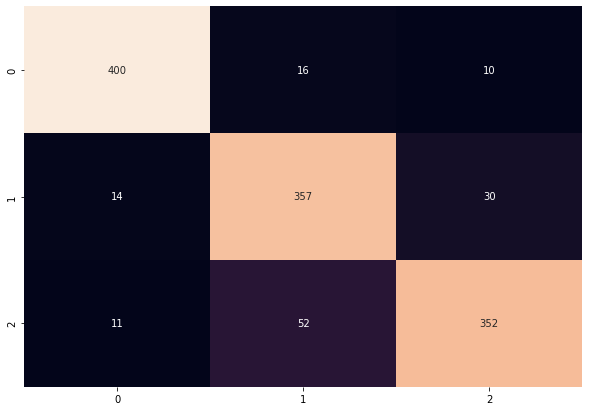

In [124]:
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False)
plt.show()

## Loading the dataset

### dataset to classify based on additional attributes

In [125]:
test=pd.read_csv("insomniaa test.csv",error_bad_lines=False)
train=pd.read_csv("insomnia train1.csv",error_bad_lines=False)

In [126]:
test.head()

,alcohol,coffee,stress,sleep_pills,insomnia
0,1,1,1,1,2
1,1,1,0,0,2
2,0,1,1,1,2
3,0,0,1,1,2
4,1,0,1,1,2


In [127]:
train.tail()

,alcohol,coffee,stress,sleep_pills,insomnia
667,0,0,1,0,0
668,1,0,1,0,2
669,0,1,0,0,1
670,1,1,0,0,1
671,0,1,0,0,0


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   alcohol      672 non-null    int64
 1   coffee       672 non-null    int64
 2   stress       672 non-null    int64
 3   sleep_pills  672 non-null    int64
 4   insomnia     672 non-null    int64
dtypes: int64(5)
memory usage: 26.4 KB


In [129]:
y_testi = test.insomnia
x_testi = test.drop('insomnia',axis = 1)
y_traini = train.insomnia
x_traini = train.drop('insomnia', axis = 1)

In [130]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)     
clr_rf = clf_rf.fit(x_traini,y_traini)

In [131]:
ac = accuracy_score(y_testi,clf_rf.predict(x_testi))
print('Accuracy is: ',ac)

pickle.dump(clr_rf,open('model.pkl','wb'))

col=x_traini.columns

type(col)
len(col)

inputt = "alcohol coffee stress".split(' ')
inputt

b=[0]*len(col)
for x in range(0,4):
    for y in inputt:
        if(col[x]==y):
            b[x]=1
b=np.array(b)
b=b.reshape(1,4)
sol=clf_rf.predict(b)
sol

Accuracy is:  0.8135593220338984


C:\Users\chatt\1by19is043\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [132]:
y_pred_eeg = clf.predict(X_test)
y_pred_data = clf_rf.predict(x_testi)

In [133]:
y_pred_eeg = y_pred_eeg[:len(y_pred_data)]


In [134]:
new_data_pred_eeg = y_pred_eeg
new_data_pred_data = y_pred_data

# Concatenate the predicted values from both models into a single data frame
new_data_combined = pd.DataFrame({
    'EEG_pred': new_data_pred_eeg,
    'data_pred': new_data_pred_data
})



In [135]:
# Concatenate the predictions from both models along with any other relevant features
X_train_data_encoded = pd.get_dummies(x_traini[:len(y_pred_data)])
X_train_data_encoded_1d=X_train_data_encoded.to_numpy().ravel()
#print(X_train_data_encoded_1d.shape)
X_train_data_encoded_1d =X_train_data_encoded_1d[:len(y_pred_data)]
#print(X_train_data_encoded_1d.shape)
X_train_combined = np.concatenate((y_pred_eeg.reshape(-1,1), y_pred_data.reshape(-1,1), X_train_data_encoded_1d.reshape(-1,1)), axis=1)


# Train a meta-model using the concatenated features
meta_model = RandomForestClassifier(random_state=42)
meta_model.fit(X_train_combined, y_traini[:len(y_pred_data)])

RandomForestClassifier(random_state=42)

In [136]:
X_test_data_encoded = pd.get_dummies(x_testi[:len(y_pred_data)])

X_test_data_encoded_1d =X_test_data_encoded[:len(y_pred_data)]
X_test_combined = np.concatenate((y_pred_eeg.reshape(-1,1), y_pred_data.reshape(-1,1), X_test_data_encoded_1d.values.reshape(-1,1)[:len(y_pred_data)]), axis=1)
y_pred_meta = meta_model.predict(X_test_combined)

# Calculate the accuracy of the combined model
accuracy_meta = meta_model.score(X_test_combined, y_testi)

print(f"The accuracy of the combined model is {accuracy_meta:.2f}")

The accuracy of the combined model is 0.85


In [137]:
new_data = pd.read_csv("insomniaa test.csv",error_bad_lines=False)
new_data_encoded = pd.get_dummies(new_data)
#print(new_data.shape)
# Use the trained meta-model to make a final prediction
new_data_combined = np.concatenate((new_data_pred_eeg.reshape(-1,1), new_data_pred_data.reshape(-1,1), new_data_encoded.values.reshape(-1,1)[:len(y_pred_data)]), axis=1)
final_prediction = meta_model.predict(new_data_combined)
print(final_prediction)


[2 1 2 2 2 1 1 0 0 2 0 1 1 0 2 0 0 1 0 2 1 1 1 0 2 1 1 0 2 1 2 2 2 1 1 0 0
 2 0 0 0 0 2 1 0 1 0 2 1 1 0 0 2 1 1 1 2 0 2]


In [138]:
import pickle
pickle.dump(clf,open('model_clfe.pkl','wb'))

# Thank YOU


##  Project by: Guide : Prof. Chandrashekar KT, Student Members : Gautham, Abhilash, Saikusal, Dhyanshekar
                